In [465]:
import numpy as np
import pickle
import traceback

a = np.random.exponential(scale=2, size=10)
print(a)
np.mean(a), np.var(a)

[2.49284216 0.90261365 0.05858422 1.8638226  0.57661686 0.54936164
 3.44682617 4.73705466 1.55078498 0.10171525]


(1.6280222192345757, 2.137153952179172)

In [466]:
def load_object(path: str):
    obj = None
    try:
        with open(path, 'rb') as f:
            obj = pickle.load(f)
    except:
        traceback.print_exc()
    assert obj is not None
    return obj

In [467]:
vgg16_local = sum(load_object('vgg16_layer_latecy_local.rec'))
resnet_local = sum(load_object('resnet_layer_latecy_local.rec'))
vgg16_local, resnet_local

(50.09890913963318, 89.82411909103394)

In [468]:
resnet_layer_local = load_object('resnet_layer_latecy_local.rec')
print(resnet_layer_local)
resnet_conv_idxs = [0, 3, 6, 10, 13, 17, 20, 22, 26, 29, 33, 36, 38, 42, 45, 49, 52, 54, 58, 61]
conv_cnt = 0
for idx in resnet_conv_idxs:
    conv_cnt += resnet_layer_local[idx]
print(conv_cnt)
print(conv_cnt / resnet_local)

[0.31938815116882324, 0.01917099952697754, 0.016346454620361328, 6.119774580001831, 0.013007640838623047, 0.009798049926757812, 6.122926712036133, 0.013004064559936523, 0.020938396453857422, 0.009432315826416016, 5.943359375, 0.013077735900878906, 0.00946807861328125, 5.9833362102508545, 0.013011455535888672, 0.0164029598236084, 0.009190559387207031, 2.891289710998535, 0.006728649139404297, 0.004436492919921875, 5.7523181438446045, 0.008565902709960938, 0.3371391296386719, 0.006335258483886719, 0.008439302444458008, 0.004773616790771484, 5.854198217391968, 0.0044879913330078125, 0.004376411437988281, 5.712428569793701, 0.00680994987487793, 0.009032249450683594, 0.004441022872924805, 3.230304002761841, 0.0034694671630859375, 0.001974821090698242, 6.262700796127319, 0.0028994083404541016, 0.3606750965118408, 0.0021474361419677734, 0.003744840621948242, 0.0031354427337646484, 6.21346378326416, 0.0030145645141601562, 0.0027158260345458984, 6.330957412719727, 0.003171205520629883, 0.0030405

Exponential Random Waiting

VGG16

In [469]:
# 1. before sending from master

# lambda=10
# r=12
# 'repetition': {'min':17.385247468948364, 'mean':23.876200278600063, 'max':30.9771625995636}
# 'uncoded': {'min':11.548107624053955, 'mean':18.213229119777683, 'max':25.72028350830078}
# 'uncoded': {'min':12.263062000274658, 'mean':19.050084193547566, 'max':29.49961256980896}

# r=12
# 'coded-5': {'min':16.028382062911987, 'mean':22.304709136486057, 'max':30.273500442504883}
# 'coded-4': {'min':14.195876121520996, 'mean':21.05504425366719, 'max':30.73371195793152}
# 'coded-3': {'min':13.508121490478516, 'mean':19.67964392900467, 'max':27.510444164276123}
# 'coded-2': {'min':12.4460928440094, 'mean':16.832865794499718, 'max':23.74692440032959}
# 'coded-1': {'min':12.031041383743286, 'mean':18.211818079153698, 'max':25.348334789276123}
# Hybrid minimum of mean layer latency: 15.82427893082301

# r=12
# 'coded-3': {'min':13.004077196121216, 'mean':17.229839622974396, 'max':26.381492614746094}
# Distributed conv idxes: [1, 4, 6, 7, 8, 10, 11, 12, 14, 15, 16]
# 'coded-2': {'min':11.819149494171143, 'mean':16.861709972222645, 'max':23.60874915122986}
# Distributed conv idxes: [3, 4, 6, 7, 8, 10, 11, 12, 14, 15, 16]
# 'coded-1': {'min':11.930824518203735, 'mean':17.2585262854894, 'max':25.891850471496582}
# Distributed conv idxes: [3, 4, 6, 7, 8, 10, 11, 12, 14, 15, 16]
# Results of mixed method:
# Layer 0: [1.58445726 1.39060229 1.23383504]
# Layer 1: [3.69744668 4.67654314 4.32793893]
# Layer 3: [1.37601686 1.17525206 1.25800598]
# Layer 4: [2.41168632 2.16410963 2.43752003]
# Layer 6: [0.79530011 0.7626858  0.76775602]
# Layer 7: [1.55162783 1.43435721 1.72068421]
# Layer 8: [1.84443611 1.58671323 1.30426743]
# Layer 10: [0.54222852 0.55758411 0.60075255]
# Layer 11: [1.36654464 1.23163799 1.32493091]
# Layer 12: [1.34889026 1.17951973 1.35151575]
# Layer 14: [0.64617771 0.59175426 0.59859423]
# Layer 15: [0.65766925 0.5791718  0.60984651]
# Layer 16: [0.64702463 0.57759033 0.61192304]
# Conv latency: [0.319610595703125, 3.6974466840426126, 1.1752520600954692, 2.1641096274058023, 0.7626857956250509, 1.4343572060267131, 1.304267426331838, 0.5422285199165344, 1.231637994448344, 1.1795197327931721, 0.5917542576789856, 0.5791717966397604, 0.5775903264681498]
# Hybrid minimum of mean layer latency: 15.58481212457021

lambda10 = 23.876200278600063, 19.050084193547566, 15.58481212457021

In [470]:
# lambda=8

# 'repetition': {'min':16.120863914489746, 'mean':21.330168604850773, 'max':27.384013891220093}
# 'uncoded': {'min':11.167882680892944, 'mean':15.348365843296053, 'max':22.086954832077026}
# 'uncoded': {'min':10.883921384811401, 'mean':15.149778107802074, 'max':21.832388401031494}
# 'uncoded': {'min':11.670941352844238, 'mean':15.520442724227905, 'max':22.449934720993042}
# 'uncoded': {'min':10.868392944335938, 'mean':15.953678131103514, 'max':22.358829736709595}


# 'coded-5': {'min':15.459391593933105, 'mean':19.176175514856975, 'max':26.667156457901}
# 'coded-4': {'min':13.069884300231934, 'mean':17.847899854183197, 'max':24.3189058303833}
# 'coded-3': {'min':12.617011547088623, 'mean':16.09440149863561, 'max':23.3389151096344}
# 'coded-2': {'min':11.896962881088257, 'mean':15.150167644023895, 'max':20.788201570510864}
# 'coded-1': {'min':11.337018728256226, 'mean':14.41590921084086, 'max':21.478854179382324}
# Hybrid minimum of mean layer latency: 13.951756536960602

# Results of single method:
# 'coded-3': {'min':12.821915626525879, 'mean':16.660992840925854, 'max':22.111902475357056}
# Distributed conv idxes: [3, 4, 6, 7, 8, 10, 11, 12, 14, 15, 16]
# 'coded-2': {'min':11.390907764434814, 'mean':14.636705656846363, 'max':21.540908336639404}
# Distributed conv idxes: [1, 3, 4, 6, 7, 8, 10, 11, 12, 14, 15, 16]
# 'coded-1': {'min':11.497905492782593, 'mean':14.538773755232496, 'max':20.188974618911743}
# Distributed conv idxes: [1, 3, 4, 6, 7, 8, 10, 11, 12, 14, 15, 16]
# Results of mixed method:
# Layer 0: [1.5944193  1.39893893 1.22967013]
# Layer 1: [4.75798122 3.44498706 3.1058683 ]
# Layer 3: [1.21101264 1.19642287 1.03876215]
# Layer 4: [2.10464825 2.23761666 1.94252646]
# Layer 6: [0.80565492 0.6529246  0.72408827]
# Layer 7: [1.21567492 1.10626207 1.27118313]
# Layer 8: [1.31434162 1.05713362 1.20893514]
# Layer 10: [0.53708422 0.45134145 0.53175118]
# Layer 11: [1.26600244 1.2117639  1.34592529]
# Layer 12: [1.22536469 1.25517766 1.28139669]
# Layer 14: [0.63817708 0.579855   0.54993886]
# Layer 15: [0.60883385 0.54367562 0.63035035]
# Layer 16: [0.63142629 0.55475446 0.56325724]
# Conv latency: [0.319610595703125, 3.1058682998021445, 1.0387621521949768, 1.9425264596939087, 0.6529245972633362, 1.1062620679537456, 1.0571336150169373, 0.451341450214386, 1.211763898531596, 1.2253646850585938, 0.5499388575553894, 0.5436756213506063, 0.5547544558842977]
# Hybrid minimum of mean layer latency: 13.785106857617697


lambda8 = 21.330168604850773, 15.953678131103514, 13.785106857617697

In [471]:
# lambda=6

# 'repetition': {'min':15.877178430557251, 'mean':18.796303669611614, 'max':26.087904930114746}
# 'repetition': {'min':15.803053855895996, 'mean':19.23096440235774, 'max':26.75723910331726}
# 'uncoded': {'min':10.05550765991211, 'mean':13.241689781347914, 'max':18.44219136238098}
# 'uncoded': {'min':10.319348812103271, 'mean':13.95914324124654, 'max':20.112041473388672}
# 'uncoded': {'min':10.496950626373291, 'mean':13.707700153191883, 'max':19.807108402252197}



# 'coded-5': {'min':14.774407863616943, 'mean':17.193170428276062, 'max':21.658924341201782}
# 'coded-4': {'min':12.92282748222351, 'mean':15.639991283416744, 'max':22.054953575134277}
# 'coded-3': {'min':12.460805177688599, 'mean':14.031397660573322, 'max':19.05789017677307}
# 'coded-2': {'min':11.333129405975342, 'mean':12.778014957904817, 'max':16.48906898498535}
# 'coded-1': {'min':10.748948097229004, 'mean':12.60868086417516, 'max':18.63809323310852}
# Hybrid minimum of mean layer latency: 12.127038339773815

# Results of single method:
# 'coded-3': {'min':12.649161577224731, 'mean':14.975890417893728, 'max':21.609859228134155}
# Distributed conv idxes: [1, 3, 4, 6, 7, 8, 10, 11, 12, 14, 15, 16]
# 'coded-2': {'min':11.4899001121521, 'mean':13.305021365483599, 'max':18.008302688598633}
# Distributed conv idxes: [3, 4, 6, 7, 8, 10, 11, 12, 14, 15, 16]
# 'coded-1': {'min':10.939956188201904, 'mean':12.818941553433737, 'max':15.781945943832397}
# Distributed conv idxes: [1, 3, 4, 6, 7, 8, 10, 11, 12, 14, 15, 16]
# Results of mixed method:
# Layer 0: [1.58689574 1.40471768 1.22645575]
# Layer 1: [3.45263201 3.43763252 2.81920165]
# Layer 3: [1.18168813 0.94351407 0.90124784]
# Layer 4: [2.16534408 1.56932217 1.66796078]
# Layer 6: [0.66176488 0.60227789 0.53424623]
# Layer 7: [1.27222619 1.15116588 1.04834282]
# Layer 8: [1.16067733 1.08785913 1.11751105]
# Layer 10: [0.52391932 0.46233288 0.46783429]
# Layer 11: [1.19800518 1.0262597  1.08124987]
# Layer 12: [1.20549196 1.09192522 1.15918231]
# Layer 14: [0.59168305 0.5252646  0.55026015]
# Layer 15: [0.60741683 0.52567271 0.54116788]
# Layer 16: [0.61025075 0.53700387 0.58594598]
# Conv latency: [0.319610595703125, 2.819201648235321, 0.9012478391329447, 1.5693221688270569, 0.5342462261517843, 1.0483428239822388, 1.0878591338793437, 0.46233288447062176, 1.0262597004572551, 1.0919252236684163, 0.5252646009127299, 0.525672713915507, 0.5370038747787476]
# Hybrid minimum of mean layer latency: 12.473469535509743

lambda6 = 19.23096440235774, 13.241689781347914, 12.127038339773815

In [472]:
# lambda=4

# 'repetition': {'min':15.696072578430176, 'mean':17.267015477021534, 'max':19.047282934188843}
# 'uncoded': {'min':9.895944356918335, 'mean':11.21967856089274, 'max':14.46934175491333}
# 'uncoded': {'min':9.944182634353638, 'mean':11.377304116884867, 'max':14.241980791091919}
# 'uncoded': {'min':10.013980627059937, 'mean':11.408759971459707, 'max':14.533931732177734}

# 'coded-5': {'min':14.763456106185913, 'mean':16.452497343222298, 'max':19.243890047073364}
# 'coded-4': {'min':12.844483613967896, 'mean':14.255286415417988, 'max':17.90911078453064}
# 'coded-3': {'min':12.347402334213257, 'mean':13.361893614133198, 'max':16.422990083694458}
# 'coded-2': {'min':11.166919708251953, 'mean':11.931125521659851, 'max':13.192510604858398}
# 'coded-1': {'min':10.733051776885986, 'mean':11.542646368344624, 'max':13.070372343063354}
# Hybrid minimum of mean layer latency: 11.399369716644287

# Results of single method:
# 'coded-3': {'min':12.409835815429688, 'mean':13.495242357254027, 'max':16.14510488510132}
# Distributed conv idxes: [1, 3, 4, 6, 7, 8, 10, 11, 12, 14, 15, 16]
# 'coded-2': {'min':11.14687466621399, 'mean':12.210952043533327, 'max':14.67179822921753}
# Distributed conv idxes: [1, 3, 4, 6, 7, 8, 10, 11, 12, 14, 15, 16]
# 'coded-1': {'min':10.782899141311646, 'mean':12.090739786624912, 'max':14.466876983642578}
# Distributed conv idxes: [1, 3, 4, 6, 7, 8, 10, 11, 12, 14, 15, 16]
# Results of mixed method:
# Layer 0: [1.59484535 1.39434127 1.22276364]
# Layer 1: [3.0756282  2.87070831 2.97705521]
# Layer 3: [1.12726239 1.06717829 0.88808912]
# Layer 4: [1.6513501  1.47867336 1.34617388]
# Layer 6: [0.62033721 0.60900084 0.54775383]
# Layer 7: [1.08101098 0.98408502 0.95050089]
# Layer 8: [1.05384878 0.92534806 0.84300331]
# Layer 10: [0.48966595 0.42091924 0.47750602]
# Layer 11: [1.15719352 0.98880229 1.10751837]
# Layer 12: [1.10738502 0.97526427 1.01316746]
# Layer 14: [0.59912592 0.52166953 0.53992345]
# Layer 15: [0.58167201 0.50950891 0.54008414]
# Layer 16: [0.60597157 0.51500322 0.5151734 ]
# Conv latency: [0.319610595703125, 2.8707083066304526, 0.888089120388031, 1.346173882484436, 0.5477538307507833, 0.9505008856455485, 0.8430033127466837, 0.4209192395210266, 0.9888022939364115, 0.9752642711003622, 0.5216695268948873, 0.5095089077949524, 0.5150032242139181]
# Hybrid minimum of mean layer latency: 11.722187499205273

lambda4 = 18.109914159774778, 11.408759971459707, 11.299491306145987

In [473]:
# lambda=2

# 'repetition': {'min':15.71597170829773, 'mean':17.721173306306206, 'max':19.21697235107422}
# 'uncoded': {'min':9.799824953079224, 'mean':10.741846760114035, 'max':12.12490177154541}

# 'coded-5': {'min':15.078979730606079, 'mean':16.343468805154163, 'max':17.795201063156128}
# 'coded-4': {'min':13.136956214904785, 'mean':14.060585697491966, 'max':15.11887240409851}
# 'coded-3': {'min':12.609990119934082, 'mean':13.483314613501229, 'max':14.548931360244751}
# 'coded-2': {'min':11.453996896743774, 'mean':11.95220951239268, 'max':12.511163473129272}
# 'coded-1': {'min':10.819029808044434, 'mean':11.479368408521017, 'max':14.124856233596802}
# Hybrid minimum of mean layer latency: 11.299491306145987

# Results of single method:
# 'coded-3': {'min':12.739831924438477, 'mean':13.861861089865366, 'max':17.106017112731934}
# Distributed conv idxes: [1, 3, 4, 6, 7, 8, 10, 11, 12, 14, 15, 16]
# 'coded-2': {'min':11.44785737991333, 'mean':12.096827387809753, 'max':13.622917890548706}
# Distributed conv idxes: [1, 3, 4, 6, 7, 8, 10, 11, 12, 14, 15, 16]
# 'coded-1': {'min':10.747905015945435, 'mean':11.436567823092142, 'max':12.412842988967896}
# Distributed conv idxes: [1, 3, 4, 6, 7, 8, 10, 11, 12, 14, 15, 16]
# Results of mixed method:
# Layer 0: [1.5933339  1.40059133 1.30701192]
# Layer 1: [3.28159624 2.78945937 2.50709546]
# Layer 3: [1.13984036 1.00958524 0.89508855]
# Layer 4: [1.62527329 1.46526136 1.29167249]
# Layer 6: [0.64475896 0.57526124 0.51433615]
# Layer 7: [1.02508646 0.96950843 0.91059472]
# Layer 8: [1.0553508  0.98116785 0.86592277]
# Layer 10: [0.49992839 0.40116276 0.43000066]
# Layer 11: [1.21117723 1.0043336  1.04360304]
# Layer 12: [1.25125962 1.01269788 1.05617032]
# Layer 14: [0.59429264 0.51058632 0.52610149]
# Layer 15: [0.59142049 0.51450404 0.52816935]
# Layer 16: [0.59708589 0.51850861 0.52302212]
# Conv latency: [0.319610595703125, 2.507095456123352, 0.8950885534286499, 1.2916724880536397, 0.5143361488978068, 0.9105947216351827, 0.865922768910726, 0.4011627634366353, 1.0043335954348247, 1.0126978754997253, 0.5105863213539124, 0.5145040353139242, 0.5185086131095886]
# Hybrid minimum of mean layer latency: 11.291294038295746

# Results of single method:
# 'coded-3': {'min':12.650034666061401, 'mean':13.467434247334797, 'max':14.424841403961182}
# Distributed conv idxes: [1, 3, 4, 6, 7, 8, 10, 11, 12, 14, 15, 16]
# 'coded-2': {'min':11.396790027618408, 'mean':12.066825032234194, 'max':12.716983318328857}
# Distributed conv idxes: [1, 3, 4, 6, 7, 8, 10, 11, 12, 14, 15, 16]
# 'coded-1': {'min':10.677037954330444, 'mean':11.282983322938282, 'max':11.912921667098999}
# Distributed conv idxes: [1, 3, 4, 6, 7, 8, 10, 11, 12, 14, 15, 16]
# Results of mixed method:
# Layer 0: [1.58150373 1.39067374 1.21000135]
# Layer 1: [3.1212947  2.88042881 2.56911151]
# Layer 3: [1.13633434 1.01675848 0.90701662]
# Layer 4: [1.58511849 1.43550942 1.34141791]
# Layer 6: [0.63766756 0.58084057 0.50000044]
# Layer 7: [1.02626451 0.98962426 0.84608678]
# Layer 8: [1.06308371 0.96401457 0.8545176 ]
# Layer 10: [0.48750035 0.38916655 0.40250415]
# Layer 11: [1.17010488 0.97942485 1.00527094]
# Layer 12: [1.18076388 0.98867071 0.98884362]
# Layer 14: [0.57084354 0.4979163  0.50475723]
# Layer 15: [0.57783441 0.50208793 0.51150177]
# Layer 16: [0.56583319 0.49759187 0.50716408]
# Conv latency: [0.319610595703125, 2.5691115061442056, 0.9070166150728861, 1.341417908668518, 0.5000004371007284, 0.8460867802302042, 0.8545175989468893, 0.3891665538152059, 0.9794248541196188, 0.9886707067489624, 0.497916301091512, 0.502087930838267, 0.4975918730099996]
# Hybrid minimum of mean layer latency: 11.217799762884777

lambda2 = 17.721173306306206, 10.741846760114035, 11.217799762884777

In [474]:
# lambda=0

# 'repetition': {'min':18.227992296218872, 'mean':18.954393406709038, 'max':20.93987727165222}
# 'uncoded': {'min':9.951072216033936, 'mean':10.537455916404724, 'max':12.01800799369812}

# 'coded-3': {'min':13.403927326202393, 'mean':13.861583193143211, 'max':14.52325439453125}
# 'coded-2': {'min':12.12893009185791, 'mean':12.441163718700409, 'max':12.803951263427734}
# 'coded-1': {'min':11.335861682891846, 'mean':11.599454383055368, 'max':11.86489486694336}
# Hybrid minimum of mean layer latency: 11.538770139217377



lambda0 = 17.267015477021534, 10.37978458404541, 11.070721411705016

In [475]:
# vgg16_latency_determined = [11.173993277097779, 11.43656781709778, 12.090739777097777, 12.86120777709778, 14.96438956709778, 17.24589595709778]
# vgg16_latency_determined = [11.173993277097779, 11.43656781709778, 12.090739777097777, 12.86120777709778, 14.96438956709778, 16.100179227097776]
# vgg16_latency_determined = [11.495973507097778, 11.43656781709778, 12.090739777097777, 12.86120777709778, 14.416105987097776, 16.100179227097776]
# vgg16_latency_determined = [11.495973507097778, 11.43656781709778, 12.090739777097777, 12.280013687097778, 14.416105987097776, 16.100179227097776]
# vgg16_latency_determined = [11.173993277097779, 11.43656781709778, 11.373261047097778, 12.280013687097778, 14.416105987097776, 16.100179227097776]
# vgg16_latency_determined = [11.173993277097779, 11.43656781709778, 11.373261047097778, 12.280013687097778, 14.281527107097777, 16.100179227097776]
vgg16_latency_determined = [11.173993277097779, 11.319978537097779, 11.373261047097778, 12.237747457097777, 14.281527107097777, 16.100179227097776]

repetition ratio [0.0, 0.021936518917189174, 0.08519701658322276, 0.20365442153089708, 0.3473261541945165]
uncoded ratio    [0.0, 0.06208552646850385, 0.2327200412610746, 0.4851895104612487, 0.773445909159975]
coded ratio      [0.0, 0.007282314267321288, 0.0810532008154885, 0.2288601284564835, 0.38929312824196893]
coded/uncoded ratio [-0.04430830316235945, 0.00957761102758481, 0.08417743203319739, 0.13592923560730108, 0.18190324167444227]
[0.043806485786998195, 0.020487230951792057, 0.7537772926760375, 1.5473594005199196, 1.303285017472433]


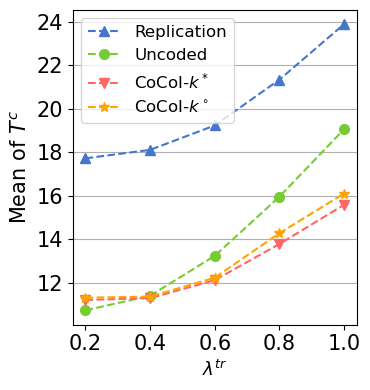

In [476]:
import matplotlib.pyplot as plt

# lambdas = [f"{i:.1f}" for i in np.arange(0, 1.1, 0.2)]
lambdas = [f"{i:.1f}" for i in np.arange(0.2, 1.1, 0.2)]
colors = ['#A0A0A0', '#4477CC', '#77CC33', '#FF6666']
figure_size = (3.8, 4)
marker_size = 7

# datas = [lambda10, lambda8, lambda6, lambda4, lambda2, lambda0]
datas = [lambda10, lambda8, lambda6, lambda4, lambda2]
datas.reverse()
repetition_latency = [lambda_latency[0] for lambda_latency in datas]
uncoded_latency = [lambda_latency[1] for lambda_latency in datas]
coded_latency = [lambda_latency[2] for lambda_latency in datas]
repetition_ratio = [i/repetition_latency[0] - 1 for i in repetition_latency]
uncoded_ratio = [i/uncoded_latency[0] - 1 for i in uncoded_latency]
coded_ratio = [i/coded_latency[0] - 1 for i in coded_latency]
print('repetition ratio', repetition_ratio)
print('uncoded ratio   ', uncoded_ratio)
print('coded ratio     ', coded_ratio)
print('coded/uncoded ratio', [1 - t1/t2 for t1, t2 in zip(coded_latency, uncoded_latency)])

diff = [abs(t1 - t2) for t1, t2 in zip(vgg16_latency_determined, coded_latency)]
print(diff)

plt.figure(figsize=figure_size)
plt.grid(axis='y')

# plt.plot(lambdas, [vgg16_local]*6, '--', color=colors[0], label='local')
plt.plot(lambdas, repetition_latency, '^--', color=colors[1], markersize=marker_size, label='Replication')
plt.plot(lambdas, uncoded_latency, 'o--', color=colors[2], markersize=marker_size, label='Uncoded')
plt.plot(lambdas, coded_latency, 'v--', color=colors[3], markersize=marker_size, label='CoCoI-$k^*$')
# plt.plot(lambdas, vgg16_latency_determined, '*--', color='orange', markersize=marker_size, label='CoCoI-$k^\circ$')
plt.plot(lambdas, vgg16_latency_determined[1:], '*--', color='orange', markersize=marker_size, label='CoCoI-$k^\circ$')
plt.xlabel('$\lambda^{tr}$', fontsize=13)
plt.ylabel('Mean of $T^c$', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('figures/vgg16_inference_stra.pdf', bbox_inches='tight')
plt.show()


ResNet18

In [477]:
# lambda=10
# 'repetition': {'min':40.96057748794556, 'mean':59.326133668422706, 'max':71.29861092567444}
# 'uncoded': {'min':29.34839963912964, 'mean':45.280570924282074, 'max':59.23646879196167}
# 'uncoded': {'min':26.494268655776978, 'mean':43.83640158176422, 'max':62.08324670791626}


# 'coded-4': {'min':33.01043248176575, 'mean':51.94945440689723, 'max':66.13332986831665}
# 'coded-3': {'min':30.730873346328735, 'mean':49.906641105810806, 'max':65.02720737457275}
# 'coded-2': {'min':28.09462594985962, 'mean':44.4603111942609, 'max':60.24150228500366}
# 'coded-1': {'min':27.06305503845215, 'mean':42.993251979351044, 'max':58.8862566947937}
# Hybrid minimum of mean layer latency: 40.78234275182088
# 'coded-4': {'min':33.68918561935425, 'mean':53.3406949241956, 'max':68.06388926506042}
# 'coded-3': {'min':30.88403606414795, 'mean':47.46358758211136, 'max':64.02217936515808}
# 'coded-2': {'min':29.554534673690796, 'mean':45.27648995320003, 'max':63.054349184036255}
# 'coded-1': {'min':28.89814066886902, 'mean':42.901400764783226, 'max':61.72723412513733}
# Hybrid minimum of mean layer latency: 41.46996613343557
# 'coded-4': {'min':31.925284385681152, 'mean':50.405154506365456, 'max':62.130532026290894}
# 'coded-3': {'min':29.34935760498047, 'mean':45.62276738882064, 'max':60.17722535133362}
# 'coded-2': {'min':27.399470806121826, 'mean':43.379109839598335, 'max':61.998356342315674}
# 'coded-1': {'min':27.408031940460205, 'mean':40.273204684257514, 'max':59.60123634338379}
# Hybrid minimum of mean layer latency: 38.1855078538259

# 'coded-3': {'min':29.342271089553833, 'mean':47.476320008436836, 'max':64.39616060256958}
# 'coded-2': {'min':27.565308094024658, 'mean':41.858186165491745, 'max':57.96237277984619}
# 'coded-1': {'min':26.02274990081787, 'mean':38.08953764041265, 'max':56.04798936843872}
# Hybrid minimum of mean layer latency: 37.120219747225455

r_lambda10 = 59.326133668422706, 45.280570924282074, 37.46370120843251

In [478]:
# lambda=8

# 'repetition': {'min':37.290152072906494, 'mean':53.01234277089438, 'max':65.1065285205841}
# 'uncoded': {'min':25.504191637039185, 'mean':37.78051857153575, 'max':54.789894104003906}
# 'uncoded': {'min':24.984490394592285, 'mean':38.14242573579153, 'max':56.12868142127991}

# 'coded-4': {'min':30.8255774974823, 'mean':49.37812709808349, 'max':65.48980116844177}
# 'coded-3': {'min':28.873711109161377, 'mean':40.37037136157354, 'max':57.74742317199707}
# 'coded-2': {'min':26.04118514060974, 'mean':38.67539105812709, 'max':54.417619943618774}
# 'coded-1': {'min':25.510653972625732, 'mean':36.57771797974904, 'max':56.72194576263428}
# Hybrid minimum of mean layer latency: 35.208400905132294
# 'coded-4': {'min':31.015137434005737, 'mean':46.503325959046684, 'max':57.36724925041199}
# 'coded-3': {'min':28.310823917388916, 'mean':42.15755049387615, 'max':58.07741641998291}
# 'coded-2': {'min':26.851856470108032, 'mean':40.60897880792618, 'max':54.96338629722595}
# 'coded-1': {'min':25.432050704956055, 'mean':36.738790531953185, 'max':52.24366760253906}
# Hybrid minimum of mean layer latency: 36.15874403715133
# 'coded-4': {'min':29.5439395904541, 'mean':40.97508951028188, 'max':55.6312301158905}
# 'coded-3': {'min':28.62745428085327, 'mean':40.19977009296417, 'max':54.74430704116821}
# 'coded-2': {'min':25.525070667266846, 'mean':34.951915899912514, 'max':48.158191204071045}
# 'coded-1': {'min':24.403308868408203, 'mean':35.505878825982414, 'max':50.260544538497925}
# Hybrid minimum of mean layer latency: 33.62683560450872
# 'coded-3': {'min':28.425606727600098, 'mean':40.911183198293045, 'max':55.805888652801514}
# 'coded-2': {'min':26.468669176101685, 'mean':37.7475283741951, 'max':54.95421767234802}
# 'coded-1': {'min':24.38339591026306, 'mean':34.865229864915214, 'max':50.339635133743286}
# Hybrid minimum of mean layer latency: 34.457507570584625
# 'coded-3': {'min':27.74636673927307, 'mean':37.15037204821905, 'max':52.52913045883179}
# 'coded-2': {'min':25.912877321243286, 'mean':34.902190685272224, 'max':51.86260747909546}
# 'coded-1': {'min':25.32012128829956, 'mean':36.17088254292806, 'max':52.696982860565186}
# Hybrid minimum of mean layer latency: 33.659103651841484
# 'coded-3': {'min':27.96196746826172, 'mean':39.4187124768893, 'max':56.62533688545227}
# 'coded-2': {'min':25.722853422164917, 'mean':36.56455955902736, 'max':49.856924533843994}
# 'coded-1': {'min':25.105061054229736, 'mean':34.62424453099569, 'max':49.03157448768616}
# Hybrid minimum of mean layer latency: 33.57326132059097

r_lambda8 = 53.01234277089438, 38.14242573579153, 33.305183827877045

In [479]:
# lambda=6
# 'repetition': {'min':36.6429979801178, 'mean':47.17821317911148, 'max':58.473910331726074}
# 'uncoded': {'min':22.74562907218933, 'mean':32.51333109537761, 'max':48.85662579536438}
# 'uncoded': {'min':21.942052841186523, 'mean':29.91970884799957, 'max':46.96454334259033}

# 'coded-4': {'min':28.85578227043152, 'mean':39.28895713885625, 'max':53.940953493118286}
# 'coded-3': {'min':27.068914651870728, 'mean':35.305142203966774, 'max':52.6816246509552}
# 'coded-2': {'min':25.10904574394226, 'mean':34.00178974866867, 'max':49.897990465164185}
# 'coded-1': {'min':23.67393159866333, 'mean':31.20091617107392, 'max':43.61151337623596}
# Hybrid minimum of mean layer latency: 30.686168452103935
# 'coded-4': {'min':29.415966510772705, 'mean':39.28300140301387, 'max':54.03918957710266}
# 'coded-3': {'min':27.635466814041138, 'mean':34.32008488972982, 'max':48.16735243797302}
# 'coded-2': {'min':24.723103523254395, 'mean':31.67987527449926, 'max':46.52003240585327}
# 'coded-1': {'min':24.3057861328125, 'mean':30.896389822165176, 'max':43.08128786087036}
# Hybrid minimum of mean layer latency: 29.863054196039837
# 'coded-3': {'min':27.629085063934326, 'mean':34.17951242129009, 'max':49.03194308280945}
# 'coded-2': {'min':25.06956672668457, 'mean':30.48830074071884, 'max':40.91244840621948}
# 'coded-1': {'min':23.673276901245117, 'mean':28.79059596856435, 'max':38.33152985572815}
# Hybrid minimum of mean layer latency: 28.333349684874214

# 'coded-3': {'min':27.371126174926758, 'mean':34.75535567601522, 'max':49.32160472869873}
# Distributed conv idxes: [3, 6, 13, 20, 26, 29, 33, 36, 42, 45, 49, 52, 58, 61]
# 'coded-2': {'min':24.8619487285614, 'mean':31.022449930508927, 'max':45.525224924087524}
# Distributed conv idxes: [3, 6, 10, 13, 20, 26, 29, 33, 36, 42, 45, 49, 52, 58, 61]
# 'coded-1': {'min':23.529942750930786, 'mean':29.31320383151372, 'max':38.397050857543945}
# Distributed conv idxes: [3, 6, 10, 13, 20, 26, 29, 33, 36, 42, 45, 49, 52, 58, 61]
# Results of mixed method:
# Layer 0: [1.56894177 1.40550113 1.22925115]
# Layer 3: [3.62696284 3.19379461 2.89218777]
# Layer 6: [3.58639528 3.18116089 2.80736462]
# Layer 10: [3.90845988 3.03170904 2.84103479]
# Layer 13: [3.64084103 3.05894214 3.16037607]
# Layer 17: [2.86061873 2.81787703 2.61251869]
# Layer 20: [2.02613356 1.77183535 1.45325343]
# Layer 22: [2.91019342 2.39725361 1.98833825]
# Layer 26: [1.91028446 1.55310102 1.53667263]
# Layer 29: [1.73335991 1.92011056 1.76185012]
# Layer 33: [1.61951904 1.62675526 1.37167627]
# Layer 36: [1.05885196 1.08659164 1.04235192]
# Layer 38: [1.52309922 1.32367857 1.04825219]
# Layer 42: [1.25048429 1.094489   0.94325014]
# Layer 45: [1.42880181 1.06834364 1.05016883]
# Layer 49: [0.85000587 0.85425117 0.77124689]
# Layer 52: [1.19978579 1.02684917 1.15530566]
# Layer 54: [0.55867316 0.51167969 0.46224988]
# Layer 58: [1.2053869  1.00759145 1.14502931]
# Layer 61: [1.20780269 1.08738633 1.12725504]
# Conv latency: [0.31938815116882324, 2.892187774181366, 2.8073646227518716, 2.841034789880117, 3.058942139148712, 2.6125186880429587, 1.4532534281412761, 0.3371391296386719, 1.5366726318995159, 1.7333599130312602, 1.37167626619339, 1.0423519213994343, 0.3606750965118408, 0.9432501395543417, 1.0501688321431477, 0.7712468902269999, 1.0268491705258687, 0.34396862983703613, 1.007591446240743, 1.0873863299687703]
# Hybrid minimum of mean layer latency: 28.877516627311703

r_lambda6 = 47.17821317911148, 32.51333109537761, 28.333349684874214

In [480]:
# lambda=4

# 'repetition': {'min':35.80381393432617, 'mean':41.4237426519394, 'max':53.06862735748291}
# 'uncoded': {'min':21.39474105834961, 'mean':26.20767501990001, 'max':35.061219215393066}
# 'uncoded': {'min':22.28502893447876, 'mean':27.258267283439636, 'max':34.32289505004883}


# 'coded-3': {'min':26.44007658958435, 'mean':30.43345111608506, 'max':42.18961048126221}
# 'coded-2': {'min':24.46616792678833, 'mean':27.649548212687176, 'max':38.611408948898315}
# 'coded-1': {'min':23.111972093582153, 'mean':26.081246356169384, 'max':33.245036602020264}
# Hybrid minimum of mean layer latency: 25.98059898614883

# 'coded-3': {'min':26.618136167526245, 'mean':29.544824103514355, 'max':36.597883224487305}
# Distributed conv idxes: [3, 6, 10, 13, 20, 26, 29, 33, 36, 42, 45, 49, 52, 58, 61]
# 'coded-2': {'min':24.585948944091797, 'mean':27.56151042381922, 'max':35.047091007232666}
# Distributed conv idxes: [3, 6, 10, 13, 20, 26, 29, 33, 36, 42, 45, 49, 52, 58, 61]
# 'coded-1': {'min':23.05089044570923, 'mean':25.55128103494644, 'max':32.01185846328735}
# Distributed conv idxes: [3, 6, 10, 13, 17, 20, 26, 29, 33, 36, 42, 45, 49, 52, 58, 61]
# Results of mixed method:
# Layer 0: [1.59135081 1.40642929 1.22925651]
# Layer 3: [3.10431147 2.80963333 2.66721741]
# Layer 6: [2.91485931 2.7938445  2.56186308]
# Layer 10: [3.02633133 2.7959882  2.64417531]
# Layer 13: [2.88466952 2.84178285 2.57967315]
# Layer 17: [2.31875978 2.23302937 2.04764771]
# Layer 20: [1.61861694 1.50175107 1.31050324]
# Layer 22: [2.15268715 2.10067447 1.64142201]
# Layer 26: [1.62419198 1.63234083 1.28085363]
# Layer 29: [1.73096561 1.63319218 1.30792447]
# Layer 33: [1.21958512 1.15408327 0.96075467]
# Layer 36: [1.02366694 0.96841812 0.92733298]
# Layer 38: [1.11458687 0.89766715 0.89300478]
# Layer 42: [1.06217317 0.9592525  0.99683291]
# Layer 45: [1.07850464 0.97041965 0.88366832]
# Layer 49: [0.77150152 0.61650155 0.65041836]
# Layer 52: [1.18250612 1.00360362 1.03316637]
# Layer 54: [0.52783285 0.40341638 0.36500055]
# Layer 58: [1.17250907 0.99342096 1.01741622]
# Layer 61: [1.17000993 1.01258679 1.04017154]
# Conv latency: [0.31938815116882324, 2.667217413584391, 2.5618630846341452, 2.6441753109296164, 2.579673151175181, 2.047647714614868, 1.3105032444000244, 0.3371391296386719, 1.2808536291122437, 1.307924469312032, 0.9607546726862589, 0.9273329774538676, 0.3606750965118408, 0.9592524965604147, 0.8836683233579, 0.6165015498797098, 1.0036036173502605, 0.34396862983703613, 0.9934209585189819, 1.0125867923100789]
# Hybrid minimum of mean layer latency: 25.398641049861908

r_lambda4 = 41.4237426519394, 27.258267283439636, 25.398641049861908

In [481]:
# lambda=2

# 'repetition': {'min':34.56571412086487, 'mean':39.28375925620397, 'max':45.26474475860596}
# 'uncoded': {'min':21.130093574523926, 'mean':22.40266299247742, 'max':25.955431938171387}
# 'uncoded': {'min':21.35798978805542, 'mean':22.381004393100735, 'max':24.629002809524536}
# 'uncoded': {'min':21.55378746986389, 'mean':22.778307477633163, 'max':25.54114055633545}
# 'uncoded': {'min':21.497291088104248, 'mean':23.08936806519826, 'max':27.520140647888184}
# 'uncoded': {'min':21.684918880462646, 'mean':23.194262603918716, 'max':28.17898201942444}
# 'uncoded': {'min':21.887118339538574, 'mean':25.24927375713984, 'max':29.179664373397827}


# 'coded-3': {'min':27.128737688064575, 'mean':29.476460297902424, 'max':32.10435390472412}
# 'coded-2': {'min':25.063796997070312, 'mean':26.771470447381336, 'max':29.608050107955933}
# 'coded-1': {'min':23.28509259223938, 'mean':24.814407050609585, 'max':28.004346132278442}
# Hybrid minimum of mean layer latency: 24.72723686695099
r_lambda2 = 39.28375925620397, 24.20927375713984, 24.72723686695099

In [482]:

r_lambda0 = 36.43476657867432, 22.682096219062807, 24.238034582138066

In [483]:
resnet_latency_determined = [24.725424283981937, 25.076455023981932, 25.55128101398193, 29.313203823981937, 35.737948173981934, 41.666173214980475]
resnet_latency_determined = [24.725424283981937, 25.076455023981932, 25.55128101398193, 29.313203823981937, 35.737948173981934, 41.666173214980475]
resnet_latency_determined = [24.725424283981937, 25.076455023981932, 25.55128101398193, 29.313203823981937, 33.67663716398193, 41.666173214980475]
resnet_latency_determined = [24.725424283981937, 25.076455023981932, 25.55128101398193, 29.313203823981937, 33.67663716398193, 38.770954514980474]

repetition ratio [0.0, 0.05447501553450396, 0.20095973685768787, 0.3494722443734122, 0.5101949200305593]
uncoded ratio    [0.0, 0.1259432049423037, 0.34301141874562524, 0.5755295313037838, 0.8703812174839756]
coded ratio      [0.0, 0.027152414421535376, 0.14583565633825235, 0.34690276989220936, 0.5150783490291369]
coded/uncoded ratio [-0.021395235355145203, 0.06822246675626065, 0.12856207806703812, 0.12682051061517519, 0.17263187182248407]
[0.0018125829690518458, 0.3221860258799758, 2.782068670892283, 3.991980003895108, 3.787064044450581]


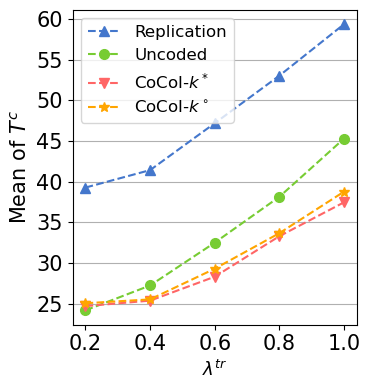

In [484]:
# r_datas = [r_lambda10, r_lambda8, r_lambda6, r_lambda4, r_lambda2, r_lambda0]
r_datas = [r_lambda10, r_lambda8, r_lambda6, r_lambda4, r_lambda2]
r_datas.reverse()
repetition_latency = [lambda_latency[0] for lambda_latency in r_datas]
uncoded_latency = [lambda_latency[1] for lambda_latency in r_datas]
coded_latency = [lambda_latency[2] for lambda_latency in r_datas]
# 受straggling effect的影响程度
repetition_ratio = [i/repetition_latency[0] - 1 for i in repetition_latency]
uncoded_ratio = [i/uncoded_latency[0] - 1 for i in uncoded_latency]
coded_ratio = [i/coded_latency[0] - 1 for i in coded_latency]
print('repetition ratio', repetition_ratio)
print('uncoded ratio   ', uncoded_ratio)
print('coded ratio     ', coded_ratio)
print('coded/uncoded ratio', [1 - t1/t2 for t1, t2 in zip(coded_latency, uncoded_latency)])

diff = [abs(t1 - t2) for t1, t2 in zip(resnet_latency_determined, coded_latency)]
print(diff)

plt.figure(figsize=figure_size)
plt.grid(axis='y')

# plt.plot(lambdas, [resnet_local]*6, '--', color=colors[0], label='local')
plt.plot(lambdas, repetition_latency, '^--', color=colors[1], markersize=marker_size, label='Replication')
plt.plot(lambdas, uncoded_latency, 'o--', color=colors[2], markersize=marker_size, label='Uncoded')
plt.plot(lambdas, coded_latency, 'v--', color=colors[3], markersize=marker_size, label='CoCoI-$k^*$')
# plt.plot(lambdas, resnet_latency_determined, '*--', color='orange', markersize=marker_size, label='CoCoI-$k^\circ$')
plt.plot(lambdas, resnet_latency_determined[1:], '*--', color='orange', markersize=marker_size, label='CoCoI-$k^\circ$')
plt.xlabel('$\lambda^{tr}$', fontsize=13)
plt.ylabel('Mean of $T^c$', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('figures/resnet_inference_stra.pdf', bbox_inches='tight')
plt.show()